# Relative cost of matrix factorizations

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.linalg as npla
import scipy.linalg as spla
from time import time

In [2]:
# https://matplotlib.org/users/customizing.html
# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
n_values = (10**np.linspace(1, 3, 15)).astype(np.int32)
n_values

array([  10,   13,   19,   26,   37,   51,   71,  100,  138,  193,  268,
        372,  517,  719, 1000], dtype=int32)

-----> lu
10 - 0.000382
13 - 0.000106
19 - 0.000198
26 - 0.000086
37 - 0.000062
51 - 0.000713
71 - 0.005673
100 - 0.000444
138 - 0.002175
193 - 0.000585
268 - 0.004244
372 - 0.001203
517 - 0.005305
719 - 0.009057
1000 - 0.015952
-----> matmat
10 - 0.000012
13 - 0.000007
19 - 0.000077
26 - 0.000015
37 - 0.000017
51 - 0.000025
71 - 0.000048
100 - 0.000098
138 - 0.000278
193 - 0.000454
268 - 0.000561
372 - 0.003681
517 - 0.005203
719 - 0.011108
1000 - 0.045962
-----> svd
10 - 0.000120
13 - 0.000152
19 - 0.000165
26 - 0.000238
37 - 0.000362
51 - 0.000560
71 - 0.000899
100 - 0.001169
138 - 0.002733
193 - 0.005083
268 - 0.010026
372 - 0.019671
517 - 0.044236
719 - 0.114390
1000 - 0.288365


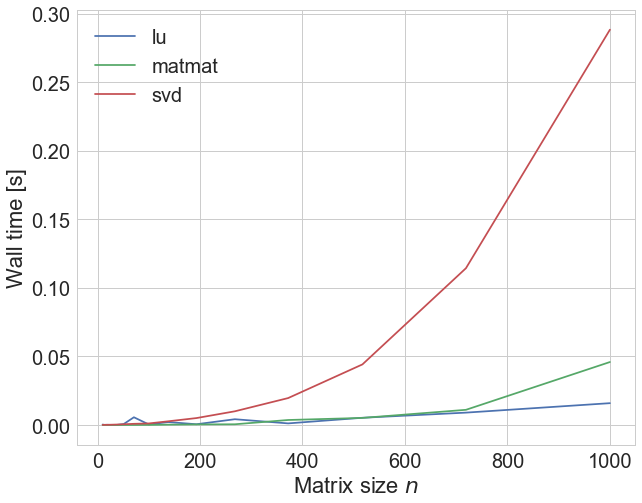

In [6]:
def matmat(A):
    A @ A

for name, f in [
        ("lu", spla.lu_factor),
        ("matmat", matmat),
        ("svd", npla.svd)
        ]:

    times = []
    print("----->", name)
    
    for n in n_values:
        A = np.random.randn(n, n)
        
        start_time = time()
        f(A)
        delta_time = time() - start_time
        times.append(delta_time)
        
        print("%d - %f" % (n, delta_time))
        
    plt.plot(n_values, times, label=name)

plt.legend(loc="best")
plt.xlabel("Matrix size $n$")
plt.ylabel("Wall time [s]");